In [1]:
import matplotlib.pyplot as plt
import scipy

## Importing the necessary libraries.

In [2]:
from hscam import HSCam
from wrdetection import WRDetection

## HSCam from hscam for handling hyperspectral camera data.
## WRDetection from uvdetection for detecting white reference.

In [3]:
hsi_file_path = 'PS131floe1_2022-07-13_001'
hsc=HSCam(hsi_file_path, from_raw=True)

## hsi_file_path specifies the path to the hyperspectral data file.
## HSCam loads and processes the hyperspectral data from the specified file.
## The from_raw=True parameter suggests that the data is being loaded in its raw format.

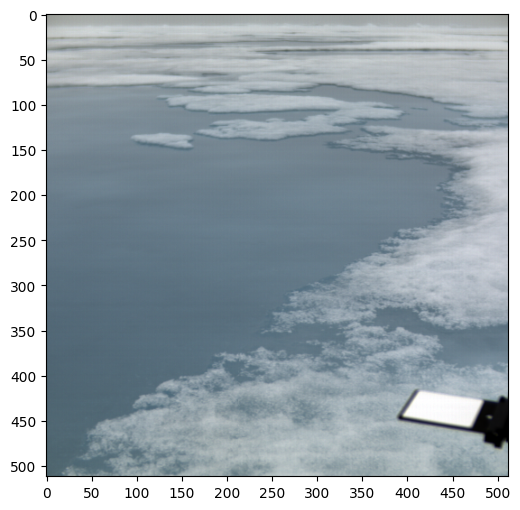

In [ ]:
plt.figure(figsize=[6,6])
hsc.quicklook()
plt.xticks(range(0,512,50))
plt.yticks(range(0,512,50));
#plt.savefig('RGB_hsi',dpi=200,bbox_inches="tight")

## This cell generates and displays a quicklook image of the hyperspectral data.

424 434


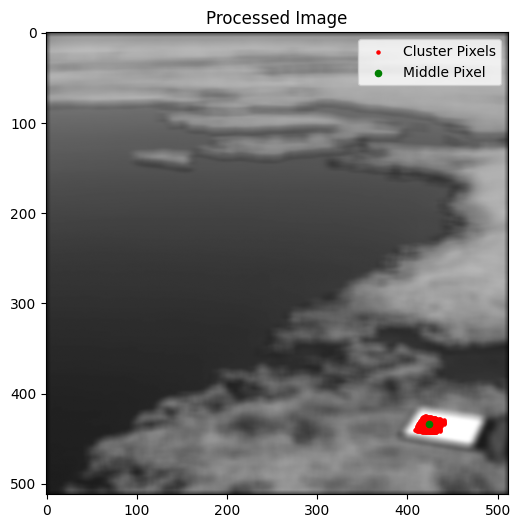

In [ ]:
wy, wx = WRDetection.get_wr_pos(hsi_file_path,400,1)
print(wx,wy)
#plt.savefig('wr_pos',dpi=200,bbox_inches="tight")

## It calls the get_wr_pos method from the MRDetection class.
## hsi_file_path specifies the path to the hyperspectral data file, and the second variable (here 400) specifies number of pixels to create brightness cluster.
## Be aware that the second variable should be intuitively adjusted depending on the illumination and atmopheric conditions. 

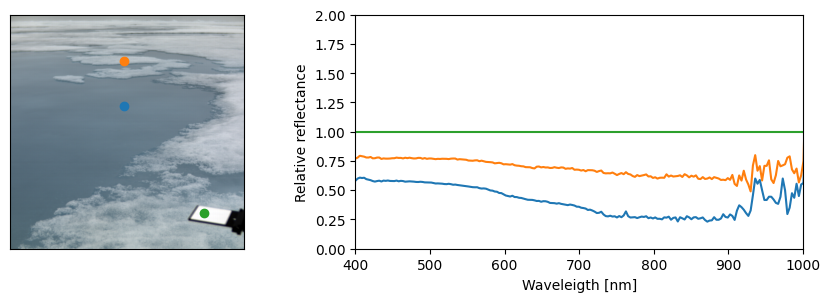

In [11]:
hsc.set_wr_spectrum(wy,wx,r=3)
fig=hsc.plot_spec_and_loc([[200,250],[100,250],[wy,wx]],r=3)        # Two points are selected ([200,250],[100,250])
fig.axes[1].set_ylim(0.0,2.0)
fig.axes[1].set_xlim(400,1000)
fig.axes[0].set_xticks([])
fig.axes[0].set_yticks([])
fig.axes[1].set_ylabel("Relative reflectance")
fig.axes[1].set_xlabel("Waveleigth [nm]")
fig.subplots_adjust(wspace=0.01, bottom=-0.05)
fig.subplots_adjust(left=0.1, bottom=0.1, right=1, wspace=0.01, hspace=1)
#plt.savefig(f"relative reflectance.png",dpi=200,bbox_inches="tight")

## hsc.set_wr_spectrum(wy,wx,r=3) sets the white reference spectrum for the hyperspectral data, and the third variable (here 3) specifies the radius of the reference in pixel unit.
## fig=hsc.plot_spec_and_loc generates a plot showing the spectra and locations of selected points.

Text(0.5, 1.0, 'λ=750 nm')

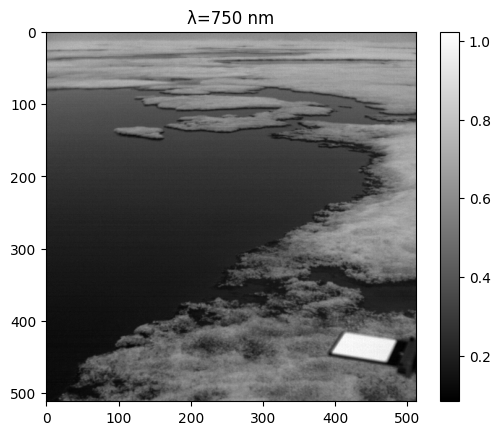

In [13]:
wl = 750     # the wl range is 400-1000 nm.
img = hsc.get_img_at_wl(wl).T       # Get the image at wavelength wl
plt.imshow(img, cmap="gray")      # Set fixed range for colorbar
plt.colorbar()
plt.title(f"λ={wl} nm")
#plt.savefig(f"image_at_{wl}nm.jpg", dpi=300, bbox_inches='tight', quality=95)

## This cell visualizes an image at a specific wavelength from hyperspectral data.

Text(0.5, 1.0, 'raw white reference spectrum')

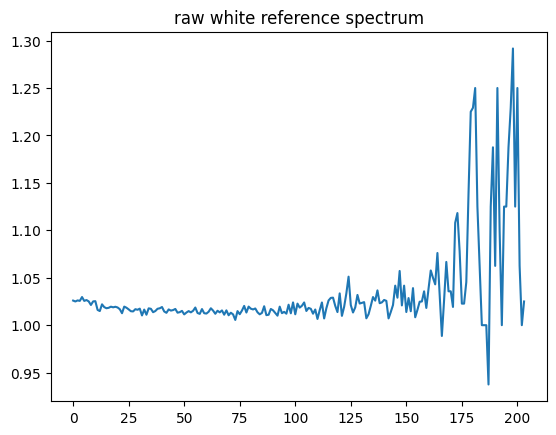

In [ ]:
plt.plot(hsc.wr_spectrum);
plt.title("raw white reference spectrum")

## This cellplots the raw white reference spectrum.

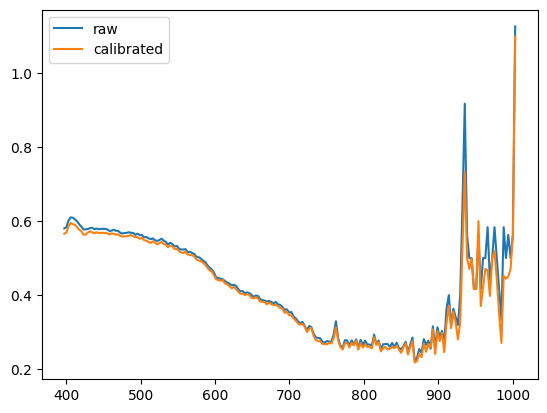

In [ ]:
plt.plot(hsc.wl,hsc.get_raw_spectrum_for_point(200,200),label="raw")
plt.plot(hsc.wl,hsc.get_cal_spectrum_for_point(200,200),label="calibrated")
plt.legend();

## plt.plot(hsc.wl,hsc.get_raw_spectrum_for_point plots the raw spectrum for a specific point in the hyperspectral data.
## plt.plot(hsc.wl,hsc.get_cal_spectrum_for_point plots the calibrated spectrum for the same point.
## hsc.get_cal_spectrum_for_point(200,200) retrieves the calibrated spectrum for the point at coordinates (200, 200).